# Diabetes Prediction Using Machine Learning
This project predicts the likelihood of diabetes using patient medical data from the Pima Indians Diabetes Database.
We perform data exploration, preprocessing, model building, and evaluation.

**Dataset Source:** [Kaggle - Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

## 1. Importing Libraries and Loading Dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.getcwd()

df= pd.read_csv("diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 2. Data Exploration (EDA)
We inspect the dataset's structure, data types, and summary statistics.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. Data Cleaning & Preprocessing
We handle missing values, fix data types, and prepare data for modeling.

In [30]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [31]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [33]:
df.isna()   #This will detect missing values in each column. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [34]:
df.isnull().sum()   #This will return the count of missing values in each column.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 4. Splitting Data into Train/Test Sets
We split the dataset to evaluate model performance.

In [35]:
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_to_check] == 0).sum()    #Counts zeroes per column

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [36]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)    #Turns 0 into NaN

## 5. Model Building
We train machine learning models to predict diabetes.

In [37]:
df[cols_with_zeros].isnull().sum()  # how many 0s were in each column — now converted to NaN.

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

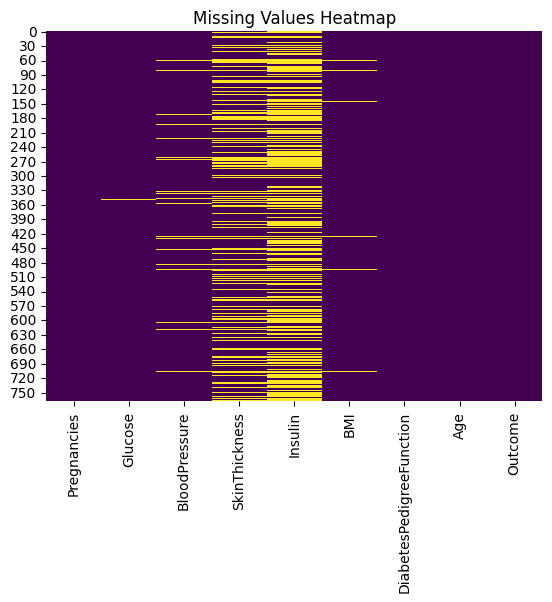

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')    #cmap=grey,magma, plasma, coolwarm ;#cbar=false:Removes the color bar legend on the right to keep the plot cleaner
plt.title("Missing Values Heatmap")
plt.show()


In [39]:
#MEAN for glucose as it has symmetric distribution and has clean data
df['Glucose']=df['Glucose'].fillna(df['Glucose'].mean())

# MEDIAN for these as in this data has(skewed=not evenly distributed & outliers=extreme high and low values)
columns_to_fill = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_fill:
    df[col]=df[col].fillna(df[col].median())

In [40]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 6. Model Evaluation
We evaluate the model using accuracy, confusion matrix, and classification report.

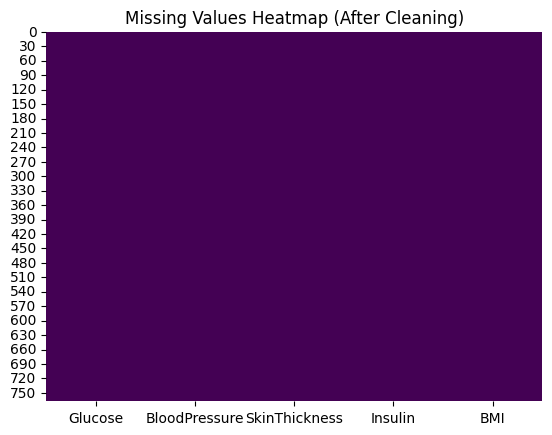

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[cols_with_zeros].isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap (After Cleaning)")
plt.show()

In [42]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Separate features and target
X = df.drop('Outcome', axis=1)  # Features (inputs)
y = df['Outcome']               # Target (output)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=42,stratify=y)

# Step 3: model training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Step 4: score
score=accuracy_score(y_test,predictions)
score


0.6883116883116883

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced',random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.7337662337662337


In [44]:
from sklearn.metrics import confusion_matrix

y_predicted=model.predict(X_test)
cm=confusion_matrix(y_test, y_predicted)
cm

array([[83, 17],
       [24, 30]])

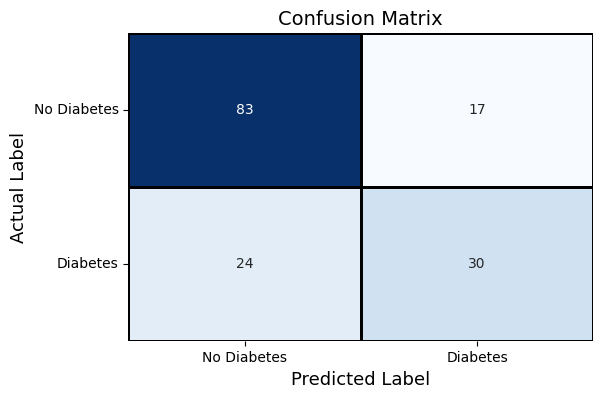

In [45]:
# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='black')

# Labels and titles
plt.xlabel('Predicted Label', fontsize=13)
plt.ylabel('Actual Label', fontsize=13)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['No Diabetes', 'Diabetes'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Diabetes', 'Diabetes'], rotation=0)

plt.show()

In [46]:
from sklearn.metrics import classification_report
import pandas as pd

cr=classification_report(y_test, y_predicted, output_dict=True)
df=pd.DataFrame(cr).transpose()
print(df) 

              precision    recall  f1-score     support
0              0.775701  0.830000  0.801932  100.000000
1              0.638298  0.555556  0.594059   54.000000
accuracy       0.733766  0.733766  0.733766    0.733766
macro avg      0.706999  0.692778  0.697996  154.000000
weighted avg   0.727521  0.733766  0.729042  154.000000


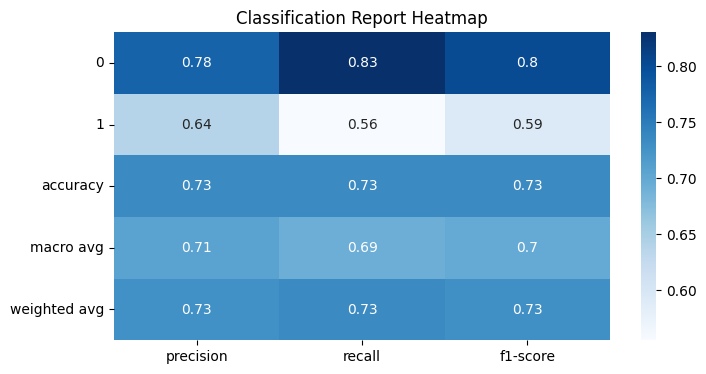

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(df.iloc[:, :-1], annot=True, cmap="Blues")  
plt.title("Classification Report Heatmap")
plt.show()

In [48]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Train the balanced Random Forest model
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)

#Predict probabilities on test set
y_proba = rf_balanced.predict_proba(X_test)[:, 1]  # Probability of class 1

#Set custom threshold and predict classes
threshold = 0.35
y_pred_custom = (y_proba >= threshold).astype(int)

#Evaluate the predictions
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))

# 7. Save the trained model to disk
joblib.dump(rf_balanced, 'final_diabetes_model.pkl')

print("\nModel saved as 'final_diabetes_model.pkl'")


Confusion Matrix:
[[73 27]
 [16 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       100
           1       0.58      0.70      0.64        54

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154


Model saved as 'final_diabetes_model.pkl'


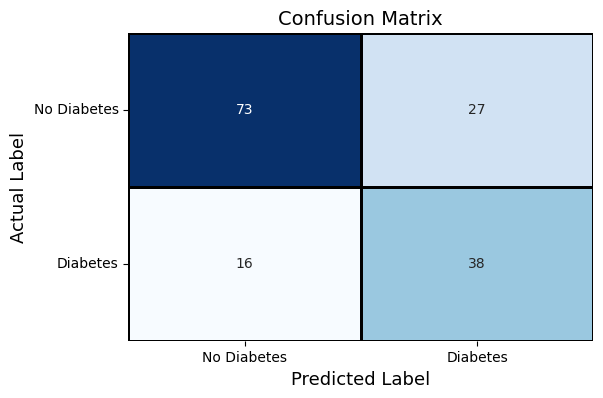

In [50]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the saved model
rf_balanced = joblib.load('final_diabetes_model.pkl')

# Predict probabilities on X_test (make sure X_test and y_test are loaded)
y_proba = rf_balanced.predict_proba(X_test)[:, 1]

# Use your chosen threshold
threshold = 0.35
y_pred_custom = (y_proba >= threshold).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_custom)


# CONFUSION MATRIX heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='black')

# Labels and titles
plt.xlabel('Predicted Label', fontsize=13)
plt.ylabel('Actual Label', fontsize=13)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['No Diabetes', 'Diabetes'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Diabetes', 'Diabetes'], rotation=0)

plt.show()

## 7. Saving the Model
We save the trained model for future use.